In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
%cd C:\\Users\\sebsa\\Documents\\Centrale Paris\\3A\\OEN\\Projet Synthese\\data

C:\Users\sebsa\Documents\Centrale Paris\3A\OEN\Projet Synthese\data


## Read and format data

### Power Plants

In [3]:
all_powerplants = []
nb_total_files = 0

Solar real

In [4]:
path = 'installed_capacity/Solar/'
files_powerplants = os.listdir(path)
nb_Solar_real = 0
files_powerplants

['CH_solar_filtered_1.csv',
 'DE_solar_filtered_1.csv',
 'DK_solar_filtered_1.csv',
 'FR_solar_filtered_1.csv',
 'PL_solar_filtered_1.csv',
 'randm_gen']

In [5]:
cols = ['energy_source','electrical_capacity','lat','lon']
for name in files_powerplants[:-1]:
    df = pd.read_csv(path+name, index_col=0)
    out = df[cols]
    out['real_or_random_generated'] = 'real'
    all_powerplants.append(out)
    nb_total_files += 1
    nb_Solar_real += 1

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,14,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
print(len(pd.concat(all_powerplants)))

1751688


In [7]:
assert(nb_total_files == len(all_powerplants))

Solar random generation

In [ ]:
path = 'installed_capacity/Solar/randm_gen/'
files_powerplants = os.listdir(path)
nb_Solar_rdm = 0
files_powerplants

In [ ]:
cols = ['energy_source','electrical_capacity','lat','lon']
for name in files_powerplants[:-1]:
    df = pd.read_csv(path+name, index_col=0)
    out = df[cols]
    out['real_or_random_generated'] = 'random'
    all_powerplants.append(out)
    nb_total_files += 1
    nb_Solar_rdm += 1

In [ ]:
assert(nb_total_files == len(all_powerplants))

Wind

In [ ]:
path = 'installed_capacity/Wind/Extraction The Wind Power/'
files_powerplants = os.listdir(path)
nb_Wind = 0
files_powerplants

In [ ]:
cols = ['energy_source','electrical_capacity','lat','lon']
for name in files_powerplants[:-1]:
    if 'formatted' in name:
        df = pd.read_csv(path+name, index_col=0)
        df['electrical_capacity'] = df['Total nominal power']
        df['lat'] = df['Latitude']
        df['lon'] = df['Longitude']
        out = df[cols]
        out['real_or_random_generated'] = 'real'
        all_powerplants.append(out)
        nb_total_files += 1
        nb_Wind += 1

In [ ]:
assert(nb_total_files == len(all_powerplants))

Concatenate df

In [ ]:
assert(nb_total_files == nb_Solar_rdm+nb_Solar_real+nb_Wind)
assert(nb_total_files == len(all_powerplants))

In [ ]:
df_all_powerplants = pd.concat(all_powerplants).reset_index().drop(['index'],axis=1)
df_all_powerplants['number'] = np.arange(len(df_all_powerplants))
df_all_powerplants['name'] = 'name_' + df_all_powerplants['number'].map(str)
df_all_powerplants.drop(['number'], axis=1, inplace=True)

In [ ]:
df_all_powerplants.head()

### Buses

In [ ]:
path = 'reseau/buses_formatted.csv'
buses = pd.read_csv(path, index_col=0)
buses.head()

In [ ]:
buses.describe()

## Associate

In [ ]:
from math import cos, asin, sqrt
from tqdm import tqdm

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    list_dist = []
    for p in data:
        list_dist.append(distance(v['lat'],v['lon'],p['lat'],p['lon']))
    return (list_dist.index(min(list_dist)), min(list_dist))
#     return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

tempDataList = [{'lat': 39.7612992, 'lon': -86.1519681}, 
                {'lat': 39.762241,  'lon': -86.158436 }, 
                {'lat': 39.7622292, 'lon': -86.1578917}]

v = {'lat': 39.7622290, 'lon': -86.1519750}
index_bus, dist = closest(tempDataList, v)
print(index_bus)
print(dist)

In [ ]:
datalist = buses.to_dict(orient='records')

for index, row in tqdm(df_all_powerplants.iterrows()):
    mypoint = {'lat': row['lat'], 'lon': row['lon']}
    index_bus, dist = closest(datalist, mypoint)
    df_all_powerplants.set_value(index, 'bus_id', buses.iloc[index_bus]['bus_id'])
    df_all_powerplants.set_value(index, 'dist_bus_km', dist)

In [ ]:
df_all_powerplants.bus_id = df_all_powerplants.bus_id.astype('int64')

In [55]:
df_all_powerplants.head()

,energy_source,electrical_capacity,lat,lon,name,bus_id,dist_bus_km,real_or_random_generated
0,Solar,0.2704,46.1795,6.1391,name_0,5114,7.518470,real
1,Solar,0.1100,47.0600,7.0635,name_1,5533,4.646528,real
2,Solar,0.0320,47.1742,8.7059,name_2,5566,3.157175,real
3,Solar,0.0396,46.5285,6.6187,name_3,5618,8.821213,real
4,Solar,0.0432,47.6405,9.1755,name_4,5607,13.099617,real


In [56]:
df_all_powerplants.to_csv('all_powerplants_with_bus.csv')

## Explore

In [36]:
df_all_powerplants = pd.read_csv('all_powerplants_with_bus.csv', index_col=0)
df_all_powerplants.head()

C:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,energy_source,electrical_capacity,lat,lon,name,bus_id,dist_bus_km
0,Solar,0.2704,46.1795,6.1391,name_0,5114,7.518470
1,Solar,0.1100,47.0600,7.0635,name_1,5533,4.646528
2,Solar,0.0320,47.1742,8.7059,name_2,5566,3.157175
3,Solar,0.0396,46.5285,6.6187,name_3,5618,8.821213
4,Solar,0.0432,47.6405,9.1755,name_4,5607,13.099617


In [37]:
len(df_all_powerplants) 

1765972

In [38]:
1751688

1751688

In [49]:
from tqdm import tqdm 

for index, row in tqdm(df_all_powerplants.iterrows()):
    if index > 1751688:
        if row['energy_source'] == 'Solar':   
            df_all_powerplants.set_value(index, 'real_or_random_generated', 'random')
    else:
        df_all_powerplants.set_value(index, 'real_or_random_generated', 'real')

1765972it [01:52, 15735.52it/s]


In [51]:
df_all_powerplants.head()

,energy_source,electrical_capacity,lat,lon,name,bus_id,dist_bus_km,real_or_random_generated
0,Solar,0.2704,46.1795,6.1391,name_0,5114,7.518470,real
1,Solar,0.1100,47.0600,7.0635,name_1,5533,4.646528,real
2,Solar,0.0320,47.1742,8.7059,name_2,5566,3.157175,real
3,Solar,0.0396,46.5285,6.6187,name_3,5618,8.821213,real
4,Solar,0.0432,47.6405,9.1755,name_4,5607,13.099617,real


In [57]:
df_all_powerplants.dist_bus_km.describe()

count    1.765746e+06
mean     1.351453e+01
std      3.431492e+01
min      3.271121e-02
25%      6.818274e+00
50%      1.160078e+01
75%      1.827481e+01
max      1.625941e+04
Name: dist_bus_km, dtype: float64

In [58]:
df_all_powerplants.dropna(inplace=True)

Number of points under 60 km : 1765334
Number of points above 60 km : 379


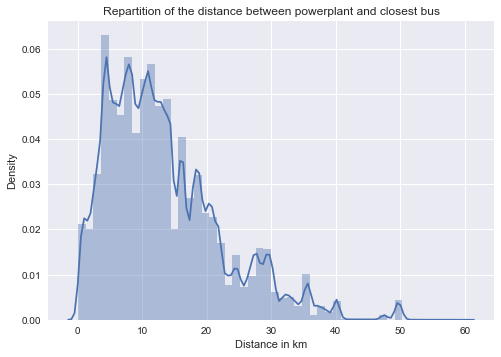

In [59]:
sns.set(color_codes=True)

limit = 60
print('Number of points under {0} km : {1}'
      .format(limit,df_all_powerplants.dist_bus_km[df_all_powerplants.dist_bus_km <= limit].count()))
print('Number of points above {0} km : {1}'
      .format(limit,df_all_powerplants.dist_bus_km[df_all_powerplants.dist_bus_km > limit].count()))

sns.distplot(df_all_powerplants.dist_bus_km[df_all_powerplants.dist_bus_km <= limit])
sns.plt.title('Repartition of the distance between powerplant and closest bus')
sns.plt.xlabel('Distance in km')
sns.plt.ylabel('Density')

In [62]:
df_bus_capacity_solar = df_all_powerplants[df_all_powerplants.energy_source == 'Solar'].groupby(['bus_id'], as_index=False)['electrical_capacity'].sum()

In [63]:
df_bus_capacity_solar.to_csv('capacity_solar_by_bus.csv')

In [66]:
df_bus_capacity_wind = df_all_powerplants[df_all_powerplants.energy_source == 'Wind'].groupby(['bus_id'], as_index=False)['electrical_capacity'].sum()

In [68]:
df_bus_capacity_wind.to_csv('capacity_wind_by_bus.csv')

In [69]:
df_bus_capacity.electrical_capacity.describe()

NameError: name 'df_bus_capacity' is not defined

In [ ]:
limit_capa = 4000
print('Number of points under {0} MW : {1}'
      .format(limit_capa,df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity <= limit_capa].count()))
print('Number of points above {0} MW : {1}'
      .format(limit_capa,df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity > limit_capa].count()))

sns.distplot(df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity <= limit_capa])
sns.plt.title('Repartition of the electrical capacity by bus')
sns.plt.xlabel('Electrical capacity in MW')
sns.plt.ylabel('Density')

## Add capacity to bus csv

In [92]:
path = 'reseau/buses_formatted.csv'
buses = pd.read_csv(path, index_col=0)
buses.head()

,bus_id,station_id,voltage,dc,symbol,lon,lat
26,6723,7564,380.0,f,joint,-0.977047,37.961746
27,6724,7565,380.0,f,joint,-0.769043,39.436193
28,6725,7566,380.0,f,joint,-0.296631,40.195659
56,6726,7567,380.0,f,joint,21.718037,42.033235
57,6727,7568,380.0,f,joint,22.061897,42.033604


In [97]:
df_bus_capacity_solar.rename(columns={'electrical_capacity':'electrical_capacity_solar'}, inplace=True)
df_bus_capacity_wind.rename(columns={'electrical_capacity':'electrical_capacity_wind'}, inplace=True)

In [101]:
df_bus_capacity_solar.head()

,bus_id,electrical_capacity_solar
0,26,40.00000
1,98,29.47377
2,129,20.00000
3,130,40.00000
4,132,60.00000


In [102]:
df_bus_capacity_wind.head()

,bus_id,electrical_capacity_wind
0,67,6.0
1,72,83.0
2,76,82.0
3,77,2.0
4,99,166.0


In [111]:
buses_merged = buses.merge(df_bus_capacity_solar, how='left', on='bus_id').fillna(value=0.)
buses_merged.head()

,bus_id,station_id,voltage,dc,symbol,lon,lat,electrical_capacity_solar
0,6723,7564,380.0,f,joint,-0.977047,37.961746,0.0
1,6724,7565,380.0,f,joint,-0.769043,39.436193,10.0
2,6725,7566,380.0,f,joint,-0.296631,40.195659,20.0
3,6726,7567,380.0,f,joint,21.718037,42.033235,0.0
4,6727,7568,380.0,f,joint,22.061897,42.033604,0.0


In [112]:
buses_merged = buses_merged.merge(df_bus_capacity_wind, how='left', on='bus_id').fillna(value=0.)
buses_merged.head()

,bus_id,station_id,voltage,dc,symbol,lon,lat,electrical_capacity_solar,electrical_capacity_wind
0,6723,7564,380.0,f,joint,-0.977047,37.961746,0.0,0.0
1,6724,7565,380.0,f,joint,-0.769043,39.436193,10.0,0.0
2,6725,7566,380.0,f,joint,-0.296631,40.195659,20.0,0.0
3,6726,7567,380.0,f,joint,21.718037,42.033235,0.0,0.0
4,6727,7568,380.0,f,joint,22.061897,42.033604,0.0,0.0


In [113]:
buses_merged.to_csv('buses_formatted_with_capacity.csv')

Number of points under 4000 MW : 2764
Number of points above 4000 MW : 50


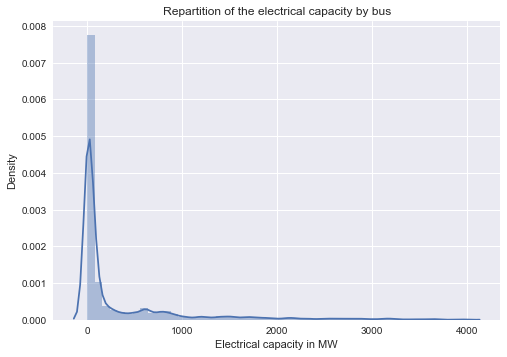

In [108]:
limit_capa = 4000
print('Number of points under {0} MW : {1}'
      .format(limit_capa,df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity <= limit_capa].count()))
print('Number of points above {0} MW : {1}'
      .format(limit_capa,df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity > limit_capa].count()))

sns.distplot(df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity <= limit_capa])
sns.plt.title('Repartition of the electrical capacity by bus')
sns.plt.xlabel('Electrical capacity in MW')
sns.plt.ylabel('Density')